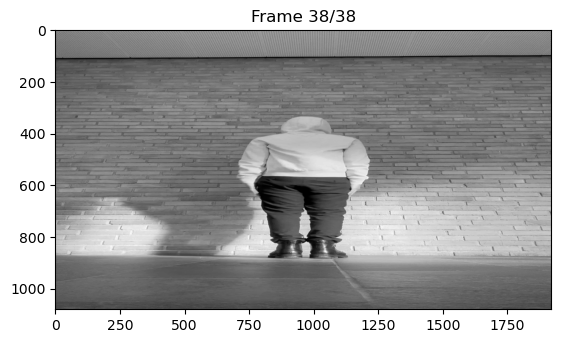

In [1]:
import os
import numpy as np
from PIL import Image
from IPython.display import display, clear_output
import time
import matplotlib.pyplot as plt


# Define the directory containing the frames
directory = str(os.curdir)+"/jumpingjackgray"

# Get the list of frame files
frame_files = sorted([f for f in os.listdir(directory) if f.endswith('.png')])

# Function to load and convert an image to grayscale
def load_and_convert_image(file_path):
    img = Image.open(file_path).convert('L')  # Convert to grayscale
    return np.array(img) / 255.0  # Normalize to [0, 1]

# Load frames into a list
frames = [load_and_convert_image(os.path.join(directory, frame)) for frame in frame_files]

# Display frames as animation
for i, frame in enumerate(frames):
    clear_output(wait=True)
    plt.imshow(frame, cmap='gray')
    plt.title(f"Frame {i + 1}/{len(frame_files)}")
    plt.show()
    time.sleep(0.005)  # Adjust the delay as needed